In [7]:
import pandas as pd
import numpy as np

### Introduction and Business Problem

For the final capstone project in Coursera's 'IBM Data Science Professional Certificate', I will be utilizing a dataset that was initially collected by the Seattle Police Department through their traffic records which contains information regarding vehicular accident severity in the Seattle area from 2004 to the present. After a quick study of the dataset's attributes and information, I decided to base my investigation on the effects of road, weather and light conditions, together with whether or not there is a driver under the influence on the severity of accidents in the Seattle area. I will firstly need to explore the dataset more thoroughly to see the basic correlations between my chosen independent variables on accident severity before I can build a machine learning model that can predict the severity of future accidents. This information could prove extremely useful to people who commute regularly because they will be able to employ preventative measures depending on the weather. Similarly, roads that are more prone to less desirable conditions due to the weather or lighting issues can be closed off or improved upon based on the findings in this investigation. Moreover, this analysis can also help inform the Seattle Police Department regarding their staffing numbers or locations based on different conditions as well as whether or not they would have to crack down on drivers under the influence more heavily.

### Description of Data

The collisions dataset contains 194,673 datapoints which each represent an accident that occured in the Seattle area from 2004 onward. Each accident has 37 pieces of information listed, which include the 5 variables that were chosen for this investigation. The first 5 rows of the full dataset for this project is shown below, together with a full list of the variables present in the dataset. However, because I decided to limit my investigation to 4 independent variables and a single dependent variable, I will also limit the dataset. This limited dataset will include the variables: 'SEVERITYCODE', 'ROADCOND', 'LIGHTCOND', 'WEATHER', and 'UNDERINFL', all of which are described in the second table below.

In [8]:
# The code was removed by Watson Studio for sharing.

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
df_data_1.dtypes.to_frame()

,0
SEVERITYCODE,int64
X,float64
Y,float64
OBJECTID,int64
INCKEY,int64
COLDETKEY,int64
REPORTNO,object
STATUS,object
ADDRTYPE,object
INTKEY,float64


In [10]:
severity_desc = "A code that corresponds to the severity of the collision"

In [11]:
info_report = pd.DataFrame(data=np.array([["SEVERITYCODE", severity_desc],
                                     ["WEATHER", "A description of the weather conditions during the time of the collision."],
                                    ["ROADCOND", "The condition of the road during the collision."],
                                    ["LIGHTCOND", "The light conditions during the collision." ],
                                         ["UNDERINFL", "Whether or not a driver involved was under the influence of drugs or alcohol." ]]), columns=["Variable", "Description"])
info_report = info_report.set_index(["Variable", "Description"])
info_report.style.set_properties(**{'text-align': 'middle'})
info_report

,
Variable,Description
SEVERITYCODE,A code that corresponds to the severity of the collision
WEATHER,A description of the weather conditions during the time of the collision.
ROADCOND,The condition of the road during the collision.
LIGHTCOND,The light conditions during the collision.
UNDERINFL,Whether or not a driver involved was under the influence of drugs or alcohol.


Severity Code Description:

- 3: fatality
- 2b: serious injury
- 2: injury
- 1: prop damage
- 0: unknown


The focused dataset is shown below and only contains data regarding the severity of each accident, the weather, road and light conditions, together with data relating to the presence of a driver under the influence.

In [12]:
df_data = df_data_1.filter(["SEVERITYCODE", "WEATHER", "ROADCOND", "LIGHTCOND", "UNDERINFL"], axis = 1)
df_data.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,2,Overcast,Wet,Daylight,N
1,1,Raining,Wet,Dark - Street Lights On,0
2,1,Overcast,Dry,Daylight,0
3,1,Clear,Dry,Daylight,N
4,2,Raining,Wet,Daylight,0


In order to prepare the data, I first had to look at the types of data that I will be working with. As you can see in the succeeding output, severity is measured by integers while my other variables are object types. Before modifying the data types, I first wanted to see more basic information about my chosen variables.

In [13]:
df_data.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
UNDERINFL       object
dtype: object


Firstly, I examined the road conditions dataframe and found that most of the accidents occured with dry road conditions. Therefore, I can convert this variable into a categorical variable with binary numbers. By clustering all the other road conditions together as one 'other' road condition, I can set the type of this variable to integer as well, with 1s and 0s representing dry or other

In [14]:
df_data_1["ROADCOND"].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [15]:
import seaborn as sns

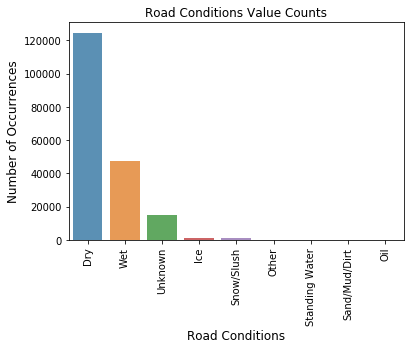

In [20]:
import matplotlib.pyplot as plt
road_count = df_data_1["ROADCOND"].value_counts()
sns.barplot(road_count.index, road_count.values, alpha = 0.8)
plt.title('Road Conditions Value Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Road Conditions', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


Similarly, light conditions can also be converted to binary figures by clumping together other light conditions besides 'Daylight', especially since other light conditions can mostly be considered relatively dark.

In [21]:
df_data_1["LIGHTCOND"].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


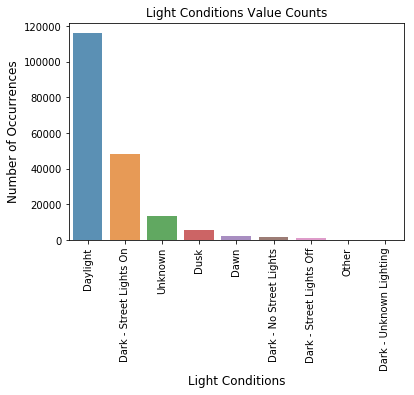

In [22]:
light_count = df_data_1["LIGHTCOND"].value_counts()
sns.barplot(light_count.index, light_count.values, alpha = 0.8)
plt.title('Light Conditions Value Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Light Conditions', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The weather variable will also follow its preceding variables and can be converted into a categorical, binary variable with clear weather being represented by 1 and other weather types as 0.

In [23]:
df_data_1["WEATHER"].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


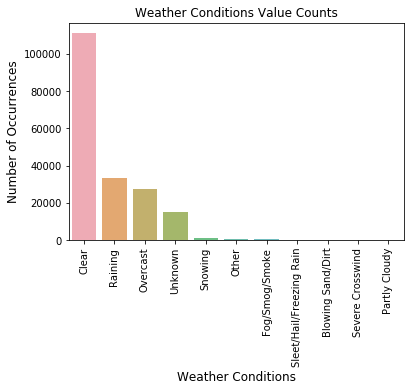

In [24]:
weather_count = df_data_1["WEATHER"].value_counts()
sns.barplot(weather_count.index, weather_count.values, alpha = 0.8)
plt.title('Weather Conditions Value Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather Conditions', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Lastly, the 'Under the Influence' variable has been categorized with 'Y' and '0' representing yes, 'N' and '1' representing no. This variable can also be cleaned up to be more uniform and just use the binary numbers 1 and 0 to represent yes and no respectively.

In [25]:
df_data_1["UNDERINFL"].value_counts().to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


Upon preparing my full dataset which will include all the categorical, independent variables, I should be able to manufacture a simple machine learning solution that will predict accident severity based on my chosen independent variables.

### Data Preparation and Exploratory Data Analysis

In [26]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
print("done")

done


In [27]:
df_data['WEATHER'] = df_data_1['WEATHER']
df_data['WEATHER'].fillna(0, inplace=True, downcast = 'infer')
df_data['WEATHER'].head()
df_data['WEATHER'].replace(to_replace=['Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',\
                                       'Severe Crosswind', 'Partly Cloudy', 'Clear'], value=[0,0,0,0,0,0,0,0,0,0,1],inplace=True)


In [28]:
df_data['WEATHER'].value_counts(normalize=True).to_frame()

,WEATHER
1,0.57088
0,0.42912


In [29]:
df_data_1['WEATHER'].value_counts(normalize = True).to_frame()

,WEATHER
Clear,0.586180
Raining,0.174823
Overcast,0.146177
Unknown,0.079597
Snowing,0.004784
Other,0.004388
Fog/Smog/Smoke,0.003001
Sleet/Hail/Freezing Rain,0.000596
Blowing Sand/Dirt,0.000295
Severe Crosswind,0.000132


In [30]:
df_data['UNDERINFL'] = df_data_1['UNDERINFL']
df_data['UNDERINFL'].fillna(0, inplace=True, downcast = 'infer')
df_data['UNDERINFL'].replace(to_replace=['Y', '0', 'N', '1'], value=[1,1,0,0],inplace=True)

In [31]:
df_data['UNDERINFL'].value_counts(normalize = True).to_frame()

,UNDERINFL
0,0.560699
1,0.439301


In [32]:
df_data_1['UNDERINFL'].value_counts(normalize = True).to_frame()

,UNDERINFL
N,0.528345
0,0.423597
Y,0.027009
1,0.021050


In [33]:
df_data['UNDERINFL'].head()

0    0
1    1
2    1
3    0
4    1
Name: UNDERINFL, dtype: int64

In [34]:
df_data.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,2,0,Wet,Daylight,0
1,1,0,Wet,Dark - Street Lights On,1
2,1,0,Dry,Daylight,1
3,1,1,Dry,Daylight,0
4,2,0,Wet,Daylight,1


In [35]:
df_data['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [36]:
df_data['ROADCOND'].fillna(0, inplace=True, downcast = 'infer')
df_data['ROADCOND'].head()
df_data['ROADCOND'].replace(to_replace=['Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'], value=[1,0,0,0,0,0,0,0,0],inplace=True)

In [37]:
df_data['ROADCOND'].head()

0    0
1    0
2    1
3    1
4    0
Name: ROADCOND, dtype: int64

In [38]:
df_data['ROADCOND'].value_counts(normalize = True).to_frame()

,ROADCOND
1,0.639585
0,0.360415


In [39]:
df_data['ROADCOND'].value_counts(normalize = True).to_frame()

,ROADCOND
1,0.639585
0,0.360415


In [40]:
df_data['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [41]:
df_data['LIGHTCOND'].fillna(0, inplace=True, downcast = 'infer')
df_data['LIGHTCOND'].head()
df_data['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Dawn', 'Dark - No Street Lights', \
                                        'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'], value=[1,0,0,0,0,0,0,0,0],inplace=True)

In [42]:
df_data['LIGHTCOND'].value_counts(normalize = True).to_frame()

,LIGHTCOND
1,0.596575
0,0.403425


In [43]:
df_data['LIGHTCOND'].value_counts(normalize = True).to_frame()

,LIGHTCOND
1,0.596575
0,0.403425


After cleaning up the independent variables, I took a look at my dependent variable: the severity code and found that, within the data set, there were only 2 variations of the severity code: 1 and 2. Therefore, the data claims that, since 2004, the accidents that have occured in the Seattle area have only caused property damage or mild injuries. Since there are only 2 variants in this set, I modified the figures to be more uniform with the rest of the new dataset by giving them the binary numbers 1 and 0.

In [44]:
df_data_1['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [45]:
df_data['SEVERITYCODE'].replace(to_replace=[1, 2], value=[0,1],inplace=True)

In [46]:
df_data['SEVERITYCODE'].value_counts(normalize = True).to_frame()

,SEVERITYCODE
0,0.701099
1,0.298901


In [47]:
df_data.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,1,0,0,1,0
1,0,0,0,0,1
2,0,0,1,1,1
3,0,1,1,1,0
4,1,0,0,1,1


### Machine Learning Training (SVM and Logistic Regression)

Because I want to create a supervised machine learning program that can classify the data in the collisions dataset and utilize regression analysis to predict the severity of future accidents in the Seattle area, I wanted to use both the logistic regression and support vector machine (SVM) approaches. While I would hypothesize that this exploration would be modeled more accurately through a logistic regression approach because I want to create categorical predictions based on the collisions data, I still think it is worthwhile to test more than one classification method.

In [48]:
X = df_data.filter(['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL'], axis = 1)
X.head()

,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,0,1,0
1,0,0,0,1
2,0,1,1,1
3,1,1,1,0
4,0,0,1,1


In [49]:
y = df_data['SEVERITYCODE'].values
y[0:5]

array([1, 0, 0, 0, 1])

Normalizing the data.

In [50]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.15340914, -1.33213439,  0.82233559, -0.88514824],
       [-1.15340914, -1.33213439, -1.21604855,  1.12975427],
       [-1.15340914,  0.75067501,  0.82233559,  1.12975427],
       [ 0.86699503,  0.75067501,  0.82233559, -0.88514824],
       [-1.15340914, -1.33213439,  0.82233559,  1.12975427]])

### SVM

Upon first trying to create an SVM model for the collisions data, I found that the size of the dataset (almost 200,000 datapoints) caused issues with the largeness of the runtime complexity. Therefore, I decided to scale down my training set to 10,000 datapoints, using the normalized data.

In [51]:
X_svm = []
counter = 0
while counter < 10000:
    X_svm.append(X[counter])
    counter += 1
X_svm[0:5]

[array([-1.15340914, -1.33213439,  0.82233559, -0.88514824]),
 array([-1.15340914, -1.33213439, -1.21604855,  1.12975427]),
 array([-1.15340914,  0.75067501,  0.82233559,  1.12975427]),
 array([ 0.86699503,  0.75067501,  0.82233559, -0.88514824]),
 array([-1.15340914, -1.33213439,  0.82233559,  1.12975427])]

In [52]:
y_svm = []
counter_y = 0
while counter_y < 10000:
    y_svm.append(y[counter_y])
    counter_y += 1
y_svm[0:5]

[1, 0, 0, 0, 1]

In [53]:
from sklearn import svm
collisions_svm = svm.SVC(kernel='rbf')
collisions_svm.fit(X_svm, y_svm)
collisions_svm

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
collisions_logisticReg = LogisticRegression(C=0.0001, solver='liblinear').fit(X,y)
collisions_logisticReg

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [56]:
from sklearn.linear_model import LogisticRegression
collisions_logisticReg_1 = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)
collisions_logisticReg_1

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [57]:
collisions_logisticReg_1.classes_

array([0, 1])

In [58]:
collisions_logisticReg_1.intercept_

array([-0.65933487])

In [59]:
collisions_logisticReg_1.coef_

array([[ 0.03771279,  0.05758869,  0.12211727, -0.03975103]])

After creating the logistic regression model for the collisions data, I used the model to predict the probability of obtaining 1s and 0s for each set of independent variable values. As you can see in the figure below, it seems that almost all the datapoints have a higher probability of returning as 0s, meaning that most or all future accidents would only cause minimal property damage.

In [60]:
collisions_logisticReg_1.predict_proba(X)

array([[0.65564403, 0.34435597],
       [0.72570878, 0.27429122],
       [0.64659154, 0.35340846],
       ...,
       [0.61011622, 0.38988378],
       [0.66746074, 0.33253926],
       [0.63824315, 0.36175685]])

In [61]:
collisions_probabilities = collisions_logisticReg_1.predict_proba(X)

In [62]:
print(collisions_probabilities[1][0])

0.7257087842965189


In [63]:
len(collisions_probabilities)

194673

In [66]:
counter_2 = 0
set_1 = []
while counter_2 < len(collisions_probabilities):
    set_1.append(collisions_probabilities[counter_2][0])
    counter_2 +=1
print(min(set_1))

0.610116215076514


In [68]:
counter_3 = 0
set_2 = []
while counter_3 < len(collisions_probabilities):
    set_2.append(collisions_probabilities[counter_3][1])
    counter_3 +=1
print(max(set_2))

0.3898837849234859


In [64]:
prob_1 = 0
counter = 0
while counter < len(collisions_probabilities):
    prob_1 += collisions_probabilities[counter][0]
    counter += 1
prob_1final = prob_1/len(collisions_probabilities)
print(prob_1final)

0.6580072017625456


In [65]:
prob_1 = 0
counter = 0
while counter < len(collisions_probabilities):
    prob_1 += collisions_probabilities[counter][1]
    counter += 1
prob_1final = prob_1/len(collisions_probabilities)
print(prob_1final)

0.34199279823851964


The pie chart below depicts the average probabilities for each type of severity present in the data as outputted by the logistic regression model.

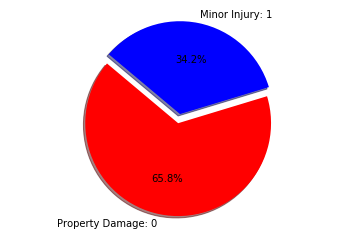

In [103]:
# Data to plot
labels = 'Property Damage: 0', 'Minor Injury: 1'
sizes = [0.6580072017625456,0.34199279823851964]
colors = ['red', 'blue']
explode = (0.1,0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [46]:
collisions_logisticReg_1.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

### Model Evaluation with a Test Set

In [47]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print('done')

done


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


In [49]:
yhat = collisions_svm.predict(X_test)
yhat
print("Train set SVM Accuracy: ", metrics.accuracy_score(y, collisions_svm.predict(X)))
print("Test set SVM Accuracy: ", metrics.accuracy_score(y_test, yhat))
svm_jaccard = jaccard_similarity_score(y_test, yhat)
svm_f1 = f1_score(y_test, yhat, average='weighted')
print("Jaccard Score: ", svm_jaccard)
print("F1-Score: ", svm_f1)

Train set SVM Accuracy:  0.7010987656223513
Test set SVM Accuracy:  0.7043790933607295
Jaccard Score:  0.7043790933607295
F1-Score:  0.5822060468781798


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
yhat = collisions_logisticReg_1.predict(X_test)
yhat_proba = collisions_logisticReg_1.predict_proba(X_test)
yhat
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y, collisions_logisticReg_1.predict(X)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat))
logisticReg_jaccard = jaccard_similarity_score(y_test, yhat)
logisticReg_f1 = f1_score(y_test, yhat, average='weighted')
logisticReg_logLoss = log_loss(y_test, yhat_proba)
print("Jaccard Score: ", logisticReg_jaccard)
print("F1-Score: ", logisticReg_f1)
print("LogLoss Score: ", logisticReg_logLoss)

Train set Logistic regression Accuracy:  0.7010987656223513
Test set Logistic regression Accuracy:  0.7043790933607295
Jaccard Score:  0.7043790933607295
F1-Score:  0.5822060468781798
LogLoss Score:  0.6073198896934224


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
preds = collisions_logisticReg.predict(X_test)

Upon producing a confusion matrix to test the accuracy of the logistic regression model, I saw that all the predicted values returned as 0 or 'property damage', which confirmed my earlier suspicions.

[[    0 11510]
 [    0 27425]]


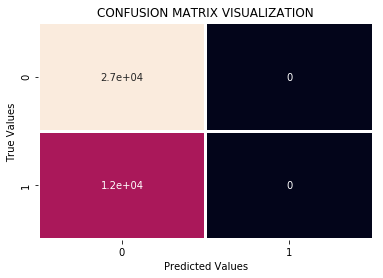

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,preds,labels=[1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,preds),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

Upon further examination of the accuracy of both the SVM and logistic regression models, we can see that both models returned the exact same scores for all shared metrics. Moreover, the table below indicates the scores of each model. Due to the low Jaccard and F1-scores, as well as the relatively high logloss score for the logistic regression model, it is clear that the relationship between my chosen independent variables and dependent variable is not as strong as I initially believed. 

In [53]:
final_report = pd.DataFrame(data=np.array([["SVM", svm_jaccard, svm_f1, "NA"],
                                    ["LogisticRegression", logisticReg_jaccard, logisticReg_f1, logisticReg_logLoss]]), columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
final_report = final_report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
final_report

,,,
Algorithm,Jaccard,F1-score,LogLoss
SVM,0.7043790933607295,0.5822060468781798,NA
LogisticRegression,0.7043790933607295,0.5822060468781798,0.6073198896934224


### Discussion and Conclusion

To conclude this investigation, it seems that the independent variables that were chosen: light, road and weather conditions, together with whether or not there was a driver under the influence were not able to predict the overall severity of each accident, upon analyzing the road collision dataset from the Seattle Police Department. There are numerous different reasons that can explain why this result occured. For example, because I converted all the independent variables into binary parameters, an abundance of minute yet important information could have been lost which could have aided in the investigation. Furthermore, because in all cases for the independent variables, one value dominated all others. In the road conditions, dry conditions were by far the most dominant, in weather conditions it was clear weather, in light conditions it was day and in the under the influence set, it was 'no'. This could have contributed to the final result in which all predicted values from the logistic regression model returned as one value. Another reason for this result could have been because the information within the data set for accident severity only included two values: minor injury and property damage. Due to this, the probability results for each predicted value could have been skewed towards the binary value in which the independent variables were skewed towards as well. 

Ultimately, the exploration into these variables was unsuccessful, however, that does not mean that these variables did not actually have a meaningful effect on accident severity. Perhaps, in the future, if I were to reinvestigate this data set, I would have to delve deeper into my dependent variable and not just rely on severity. It would be helpful to create a separate metric that combines the severity code with the number of people injured, the amount of property damage and the accident description to classify actual severity. With that custom made dependent variable, I would expect to garner a different result and create a more accurate model. 

The final conclusions of this report essentially state that it is extremely likely, that accidents in Seattle will cause property damage at the very least, with a small chance of minor injuries to present parties. More concisely, we saw that there is around a 65.8% chance that there is only property damage and a 34.2% chance that there is a minor injury for each accident. The Seattle Police Department could still find this data useful as they could use the model to predict the percentage chance of injuries or only property damage depending on the factors laid out through the chosen independent variables. Hence, by creating more tests with the model, the SPD could pinpoint the main driving force that increases the likelihood for injuries, which they could mitigate in the future through new policies or infrastructure.